# OHBM 2021 NiMARE tutorial

In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
from nilearn import plotting
from pprint import pprint

import nimare

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Basics of NiMARE datasets
NiMARE relies on a specification for meta-analytic datasets named [NIMADS](https://github.com/neurostuff/NIMADS). NIMADS is currently under development.

In [2]:
with open("data/nidm_pain_dset.json", "r") as fo:
    data = json.load(fo)

reduced_data = {k: v for k, v in data.items() if k in list(data.keys())[:2]}

pprint(reduced_data)

{'pain_01.nidm': {'contrasts': {'1': {'coords': {'space': 'MNI',
                                                 'x': [48.0,
                                                       54.0,
                                                       60.0,
                                                       60.0,
                                                       38.0,
                                                       44.0,
                                                       52.0,
                                                       36.0,
                                                       -36.0,
                                                       26.0,
                                                       12.0,
                                                       -2.0,
                                                       -60.0,
                                                       -56.0,
                                                       -50.0,
                

In [3]:
dset_dir = nimare.extract.download_nidm_pain(data_dir="data/")
pain_dset = nimare.dataset.Dataset("data/nidm_pain_dset.json")
pain_dset.update_path(dset_dir)

INFO:nimare.utils:Shared path detected: '/Users/taylor/Documents/tsalo/ohbm2021-nimare-tutorial/data/nidm_21pain/'


The `Dataset` stores most relevant information as properties- specifically pandas `DataFrame`s.

In [4]:
pain_dset.coordinates.head()

,id,study_id,contrast_id,x,y,z,space,i,j,k
0,pain_01.nidm-1,pain_01.nidm,1,48.0,-38.0,-24.0,mni152_2mm,21,44,24
14,pain_01.nidm-1,pain_01.nidm,1,-50.0,-42.0,-24.0,mni152_2mm,70,42,24
13,pain_01.nidm-1,pain_01.nidm,1,-56.0,-62.0,-6.0,mni152_2mm,73,32,33
12,pain_01.nidm-1,pain_01.nidm,1,-60.0,-52.0,-10.0,mni152_2mm,75,37,31
11,pain_01.nidm-1,pain_01.nidm,1,-2.0,-104.0,-2.0,mni152_2mm,46,11,35


In [5]:
pain_dset.metadata.head()

,id,study_id,contrast_id,sample_sizes
0,pain_01.nidm-1,pain_01.nidm,1,[25]
1,pain_02.nidm-1,pain_02.nidm,1,[25]
2,pain_03.nidm-1,pain_03.nidm,1,[20]
3,pain_04.nidm-1,pain_04.nidm,1,[20]
4,pain_05.nidm-1,pain_05.nidm,1,[9]


In [6]:
pain_dset.images.head()

,id,study_id,contrast_id,beta__relative,se__relative,t__relative,z__relative,beta,se,t,z
0,pain_01.nidm-1,pain_01.nidm,1,pain_01.nidm/Contrast.nii.gz,pain_01.nidm/ContrastStandardError.nii.gz,pain_01.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
1,pain_02.nidm-1,pain_02.nidm,1,pain_02.nidm/Contrast.nii.gz,pain_02.nidm/ContrastStandardError.nii.gz,pain_02.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
2,pain_03.nidm-1,pain_03.nidm,1,pain_03.nidm/Contrast.nii.gz,pain_03.nidm/ContrastStandardError.nii.gz,pain_03.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
3,pain_04.nidm-1,pain_04.nidm,1,pain_04.nidm/Contrast.nii.gz,pain_04.nidm/ContrastStandardError.nii.gz,pain_04.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
4,pain_05.nidm-1,pain_05.nidm,1,pain_05.nidm/Contrast.nii.gz,pain_05.nidm/ContrastStandardError.nii.gz,pain_05.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None


There are functions to convert common formats for meta-analysis datasets- namely [Neurosynth](https://github.com/neurosynth/neurosynth-data) and [Sleuth](http://brainmap.org/sleuth/) files.

Downloading and converting the Neurosynth dataset takes a long time, so we will use a pregenerated version of the dataset. However, here is the code we would use to download and convert the dataset from scratch:

```python
nimare.extract.fetch_neurosynth("data/", unpack=True)
ns_dset = nimare.io.convert_neurosynth_to_dataset(
    "data/database.txt",
    "data/features.txt",
)
```

In [7]:
ns_dset = nimare.dataset.Dataset.load("data/neurosynth_dataset.pkl.gz")

In [8]:
sleuth_dset = nimare.io.convert_sleuth_to_dataset("data/sleuth_dataset.txt")

## Searching large datasets

The `Dataset` class contains multiple methods for selecting subsets of studies within the dataset.

One common approach is to search by "labels" or "terms" that apply to studies. In Neurosynth, labels are derived from term frequency within abstracts.

In [9]:
pain_ids = ns_dset.get_studies_by_label("Neurosynth_TFIDF__pain", label_threshold=0.001)
ns_pain_dset = ns_dset.slice(pain_ids)

INFO:nimare.utils:Shared path detected: '/home/data/nbc/misc-projects/Salo_NiMARE/nimare-paper/data/ns_dset_maps/'
/Users/taylor/Documents/tsalo/NiMARE/nimare/utils.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_df[abs_col + "__relative"] = image_df[abs_col].apply(


A MACM (meta-analytic coactivation modeling) analysis is generally performed by running a meta-analysis on studies with a peak in a region of interest.

In [10]:
sphere_ids = ns_dset.get_studies_by_coordinate([[24, -2, -20]], r=6)
sphere_dset = ns_dset.slice(sphere_ids)

INFO:nimare.utils:Shared path detected: '/home/data/nbc/misc-projects/Salo_NiMARE/nimare-paper/data/ns_dset_maps/'


## Running meta-analyses

### Coordinate-based meta-analysis

<ipython-input-11-d6fddd68cb81>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


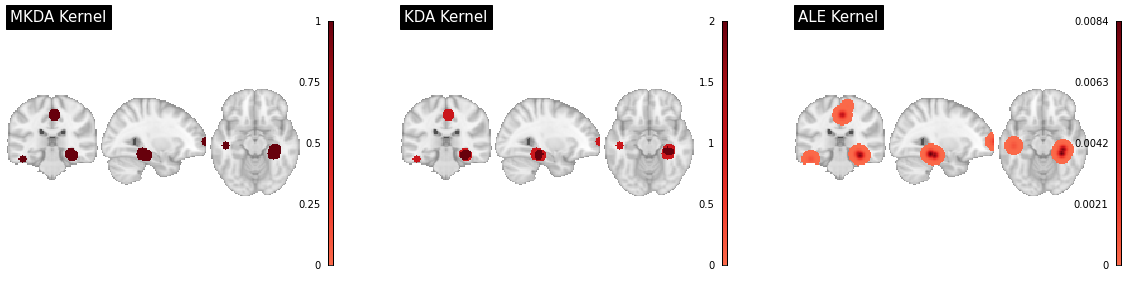

In [11]:
mkda_kernel = nimare.meta.kernel.MKDAKernel(r=10)
mkda_ma_maps = mkda_kernel.transform(sleuth_dset, return_type="image")
kda_kernel = nimare.meta.kernel.KDAKernel(r=10)
kda_ma_maps = kda_kernel.transform(sleuth_dset, return_type="image")
ale_kernel = nimare.meta.kernel.ALEKernel(sample_size=20)
ale_ma_maps = ale_kernel.transform(sleuth_dset, return_type="image")

# Let's show the kernels
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
plotting.plot_stat_map(
    mkda_ma_maps[28],
    annotate=False,
    axes=axes[0],
    cmap="Reds",
    cut_coords=[30, -30, -14],
    draw_cross=False,
    figure=fig,
    title="MKDA Kernel",
)
plotting.plot_stat_map(
    kda_ma_maps[28],
    annotate=False,
    axes=axes[1],
    cmap="Reds",
    cut_coords=[30, -30, -14],
    draw_cross=False,
    figure=fig,
    title="KDA Kernel",
)
plotting.plot_stat_map(
    ale_ma_maps[28],
    annotate=False,
    axes=axes[2],
    cmap="Reds",
    cut_coords=[30, -30, -14],
    draw_cross=False,
    figure=fig,
    title="ALE Kernel",
)
fig.show()

In [16]:
ale_meta = nimare.meta.cbma.ale.ALE(null_method="approximate")
ale_results = ale_meta.fit(sleuth_dset)
ale_results.maps

{'stat': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.89476717e-05, 7.39929504e-05, 1.86636247e-05]),
 'p': array([1.        , 1.        , 1.        , ..., 0.45645078, 0.4560558 ,
        0.56475849]),
 'z': array([0.        , 0.        , 0.        , ..., 0.10937942, 0.11037549,
        0.        ])}

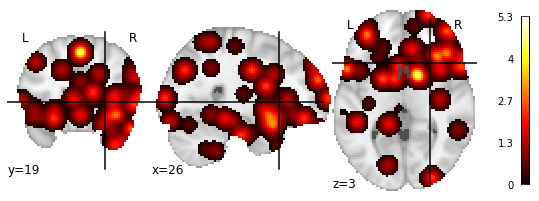

In [17]:
plotting.plot_stat_map(ale_results.get_map("z"))

In [19]:
mc_corrector = nimare.correct.FWECorrector(
    method="montecarlo", 
    n_iters=100, 
    n_cores=1,
)
mc_results = mc_corrector.transform(ale_results)
mc_results.maps

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


{'stat': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.89476717e-05, 7.39929504e-05, 1.86636247e-05]),
 'p': array([1.        , 1.        , 1.        , ..., 0.45645078, 0.4560558 ,
        0.56475849]),
 'z': array([0.        , 0.        , 0.        , ..., 0.10937942, 0.11037549,
        0.        ]),
 'logp_level-voxel_corr-FWE_method-montecarlo': array([0.00436481, 0.00436481, 0.00436481, ..., 0.00436481, 0.00436481,
        0.00436481]),
 'z_level-voxel_corr-FWE_method-montecarlo': array([0., 0., 0., ..., 0., 0., 0.]),
 'logp_level-cluster_corr-FWE_method-montecarlo': array([0.00436481, 0.00436481, 0.00436481, ..., 0.00436481, 0.00436481,
        0.00436481]),
 'z_level-cluster_corr-FWE_method-montecarlo': array([0., 0., 0., ..., 0., 0., 0.])}

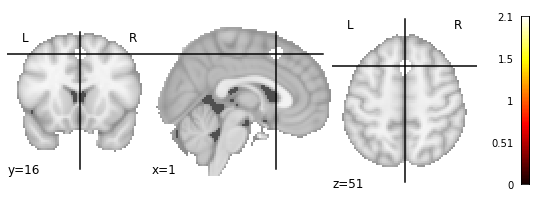

In [21]:
plotting.plot_stat_map(mc_results.get_map("z_level-cluster_corr-FWE_method-montecarlo"))

### Image-based meta-analysis

In [22]:
pain_dset.images.head()

,id,study_id,contrast_id,beta__relative,se__relative,t__relative,z__relative,beta,se,t,z
0,pain_01.nidm-1,pain_01.nidm,1,pain_01.nidm/Contrast.nii.gz,pain_01.nidm/ContrastStandardError.nii.gz,pain_01.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
1,pain_02.nidm-1,pain_02.nidm,1,pain_02.nidm/Contrast.nii.gz,pain_02.nidm/ContrastStandardError.nii.gz,pain_02.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
2,pain_03.nidm-1,pain_03.nidm,1,pain_03.nidm/Contrast.nii.gz,pain_03.nidm/ContrastStandardError.nii.gz,pain_03.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
3,pain_04.nidm-1,pain_04.nidm,1,pain_04.nidm/Contrast.nii.gz,pain_04.nidm/ContrastStandardError.nii.gz,pain_04.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None
4,pain_05.nidm-1,pain_05.nidm,1,pain_05.nidm/Contrast.nii.gz,pain_05.nidm/ContrastStandardError.nii.gz,pain_05.nidm/TStatistic.nii.gz,None,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,/Users/taylor/Documents/tsalo/ohbm2021-nimare-...,None


In [23]:
# Calculate missing images
pain_dset.images = nimare.transforms.transform_images(
    pain_dset.images,
    target="z",
    masker=pain_dset.masker,
    metadata_df=pain_dset.metadata,
)
pain_dset.images = nimare.transforms.transform_images(
    pain_dset.images,
    target="varcope",
    masker=pain_dset.masker,
    metadata_df=pain_dset.metadata,
)

INFO:nimare.utils:Shared path detected: '/Users/taylor/Documents/tsalo/ohbm2021-nimare-tutorial/data/nidm_21pain/'
INFO:nimare.utils:Shared path detected: '/Users/taylor/Documents/tsalo/ohbm2021-nimare-tutorial/data/nidm_21pain/'


In [24]:
dsl_meta = nimare.meta.ibma.DerSimonianLaird()
dsl_results = dsl_meta.fit(pain_dset)

/Users/taylor/Documents/tsalo/PyMARE/pymare/stats.py:23: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (v + tau2)
/Users/taylor/Documents/tsalo/PyMARE/pymare/estimators/estimators.py:200: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / v


/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


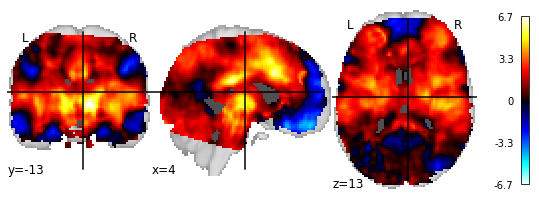

In [25]:
plotting.plot_stat_map(dsl_results.get_map("z"))

In [26]:
ols_meta = nimare.meta.ibma.PermutedOLS()
ols_results = ols_meta.fit(pain_dset)

/Users/taylor/Documents/tsalo/nilearn/nilearn/mass_univariate/permuted_least_squares.py:391: UserWarning: Some descriptors in 'target_vars' have zeros across all samples. These descriptors will be ignored during null distribution generation.
  warnings.warn("Some descriptors in 'target_vars' have zeros across all "
/Users/taylor/Documents/tsalo/nilearn/nilearn/mass_univariate/permuted_least_squares.py:52: RuntimeWarning: invalid value encountered in true_divide
  ret = (m.T / np.sqrt(np.sum(m ** 2, axis=0))[:, np.newaxis]).T


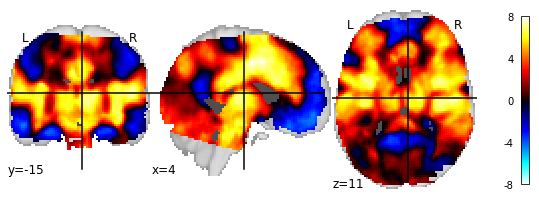

In [27]:
plotting.plot_stat_map(ols_results.get_map("z"))